<a href="https://colab.research.google.com/github/AliyanAamir/CodeClause_Stock_market_analysis/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **- Installing yfinance package so that we can fetch live stock data**


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **- Importing all the important python libraries required for analysis**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from datetime import datetime 


# **- Setting GridStyle and enabling matplotlib inline**

In [ ]:
sns.set_style('whitegrid')
plt.style.use("ggplot")
%matplotlib inline

# **- Setting the dataframes in variables defined by their code names fetched globally**

In [ ]:
stocks= ["AAPL","GOOG","MSFT","AMZN"] 
# fetching the data of of atleast one year.
end= datetime.now() 
start= datetime(end.year - 1, end.month, end.day)
#dowloading data of the mentioned stocks and setting these dataframes globally
for stock in stocks:
  globals()[stock] = yf.download(stock, start, end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# **- Making a list of all the dataframes dowloaded**

In [ ]:
dfs=[AAPL,GOOG,MSFT,AMZN]
companies = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]
for df,company in zip(dfs,companies):
  df["Name"] = company
df= pd.concat(dfs,axis=0)


# **- Visualizing the Volumes of Different Stocks**

Text(0.5, 1.0, 'VOLUMES')

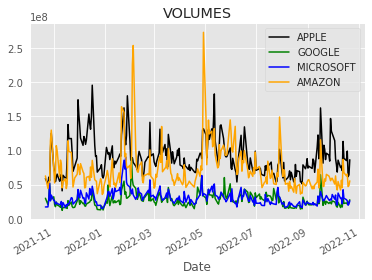

In [ ]:
colors=["black","green","blue","orange"]
for df,color,company in  zip(dfs,colors,companies):
  df["Volume"].plot(color=color,label=company)
plt.legend()
plt.title("VOLUMES")

# **- Defining Moving Average for each stock of 10, 50 and 100 days**

In [ ]:
for df in dfs:
  df["MA10"] = df['Open'].rolling(10).mean()
  df["MA50"] = df['Open'].rolling(50).mean()
  df["MA100"] = df['Open'].rolling(100).mean()


# **- Plotting Moving Average of each stock for 10, 50 and 100 days**

Text(0.5, 1.0, 'AMAZON')

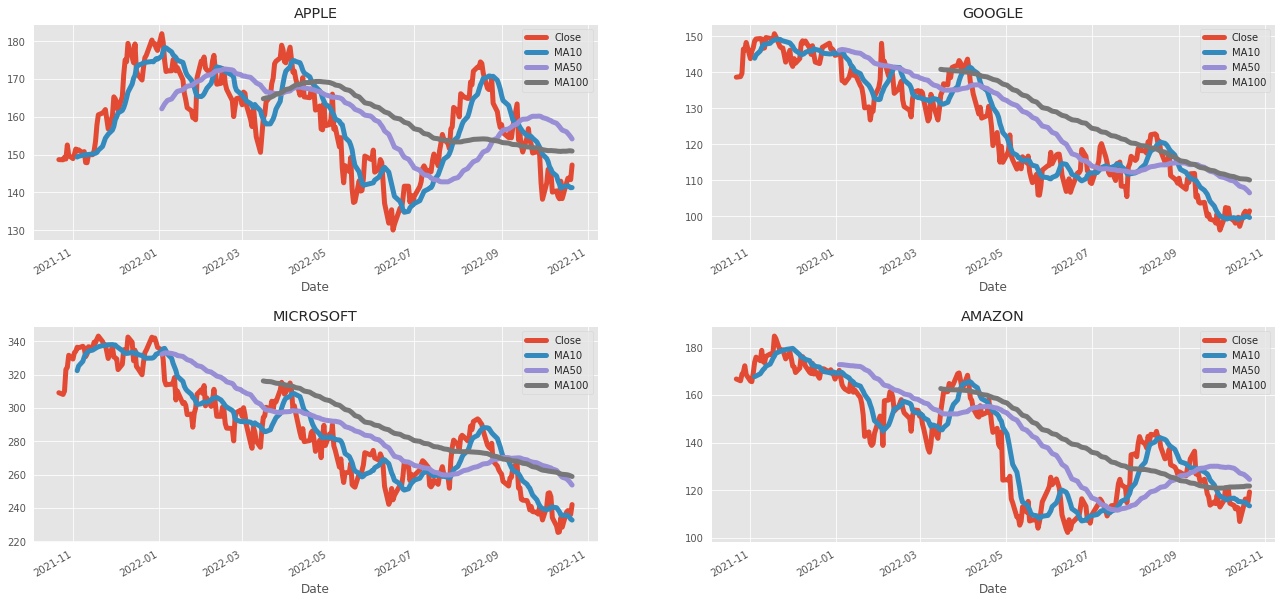

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(top=2, bottom=1.2 , right=3,hspace=0.4)

AAPL[['Close', 'MA10', 'MA50', 'MA100']].plot(ax=axes[0,0],linewidth=5)
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA10', 'MA50', 'MA100']].plot(ax=axes[0,1],linewidth=5)
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA10', 'MA50', 'MA100']].plot(ax=axes[1,0],linewidth=5)
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA10', 'MA50', 'MA100']].plot(ax=axes[1,1],linewidth=5)
axes[1,1].set_title('AMAZON')

  



In [ ]:
closings= pd.DataFrame([AAPL["Close"],GOOG["Close"],MSFT["Close"],AMZN["Close"]]).transpose()
for i,company in enumerate(companies):
  closings.columns.values[i]= f"{company} closing"

# **- Identifying the pattern of Closings of Google Stock**

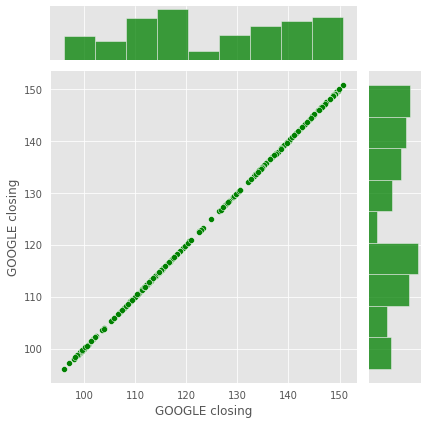

In [ ]:
sns.jointplot(data=closings,x="GOOGLE closing",y="GOOGLE closing",color="green")

# **- Comparing Closing relationship of Google with Apple**

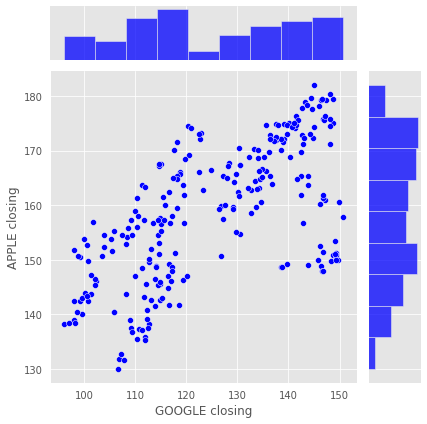

In [ ]:
sns.jointplot(data=closings,x="GOOGLE closing",y="APPLE closing",color="blue")


# **- Comparing Closing relationship of Google with Amazon**

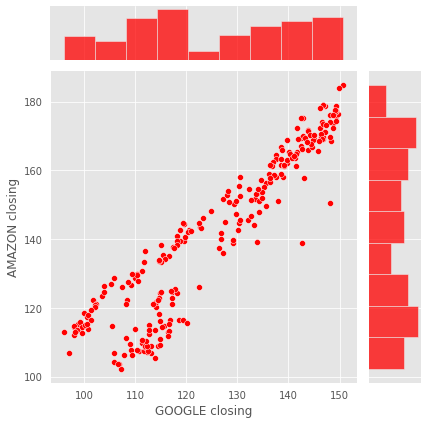

In [ ]:
sns.jointplot(data=closings,x="GOOGLE closing",y="AMAZON closing",color="red")

# **- Comparing Closing relationship of Google with Microsoft**

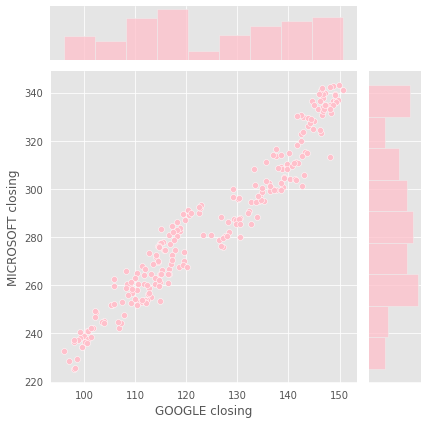

In [ ]:
sns.jointplot(data=closings,x="GOOGLE closing",y="MICROSOFT closing",color="pink")

# **- Plotting the remaining relationship plots with each other**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a2b4d390>,
      dtype=object)

<Figure size 1296x432 with 0 Axes>

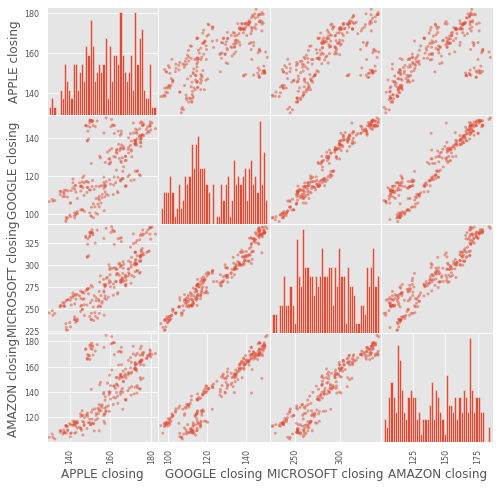

In [ ]:
plt.figure(figsize=(18, 6))
scatter_matrix(closings, figsize = (8,8), hist_kwds= {'bins':50})

# **- Finding the Correlation between each Closings**

In [ ]:
correlation_closing=closings.corr()

# **- Plotting a heatmap for Correlation found above.**

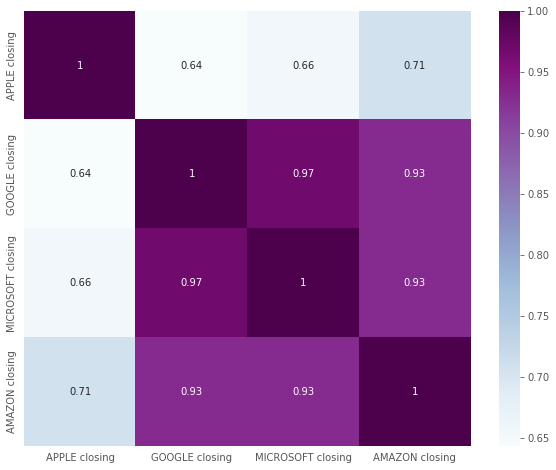

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_closing,cmap="BuPu",annot=True)


# **- Instead of producing predictions for each of the Stocks, we can produce it individually by taking one Stock information at a time**

In [ ]:
n=input("Enter the code of stock you want to perform prediction: ")

Enter the code of stock you want to perform prediction: AAPL


# **- Fetching Data from 2010 to present date but this time of Individual stocks**

In [ ]:
stock_2012_df= yf.download(n,"2010-01-01", end)


[*********************100%***********************]  1 of 1 completed


# **- Importing All the required Tools for prediction and testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# **- Defining X and y variables from data downloaded above.**

In [ ]:
X= stock_2012_df.drop("Close",axis=1)
y = stock_2012_df["Close"]

print(X.shape)
print(y.shape)


(3224, 5)
(3224,)


# **- Splitting the data into test and training sets**

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# **- Performing Cross Validation and finding the mean accuracy from the test**

In [ ]:
cv = cross_val_score(Ridge(), X_test, y_test, cv=10)
print('Accuracy:', cv.mean())

Accuracy: 0.9999375997667173


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.9407e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.03055e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.93671e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.88059e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi

# **- Finally Making a pipeline with Standard Scaler and Ridge model and fitting the model**

In [ ]:
pipe= make_pipeline(StandardScaler(),Ridge())
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)


# **- Finding Root Mean Square Error**

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Root Mean Square Error : {RMSE}')

Root Mean Square Error : 0.48328928524094994


# **- Preparing another dataframe with Validation and Predicted Values**

In [ ]:
y_pred=pd.DataFrame(y_pred,columns=["close_pred"])
y_test = y_test.reset_index()
y_test["Date"]=y_test['Date'].dt.date


In [ ]:
y_pred_test= pd.concat([y_test,y_pred],axis=1)



In [ ]:
y_pred_test.set_index("Date")
y_pred_test.rename(columns={"Close":"close_val"},inplace=True)

# **- Plotting the validation and predicted values**

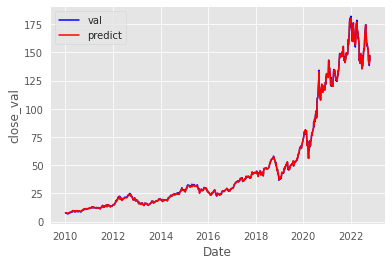

In [ ]:
sns.lineplot(data=y_pred_test,x="Date",y="close_val",color="blue",label="val")
sns.lineplot(data=y_pred_test,x="Date",y="close_pred",color="red",label="predict")
plt.legend()
